In [165]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np



In [166]:
df = pd.read_csv("dataset.csv")
df

,id,year,month,day,hour,minute,ws40,ws50,ws60,ws70,...,cis10,cis11,cis12,cis13,cis14,cis15,cis16,cis17,cis18,cis19
0,2021-09-16 18:00:00,2021,9,16,18,0,7.44,7.64,7.82,8.04,...,0.004,0.004,0.004,0.003,0.004,0.006,0.006,0.0060,0.0070,0.0075
1,2021-09-16 18:10:00.000004,2021,9,16,18,10,7.45,7.79,8.09,8.33,...,0.008,0.006,0.004,0.004,0.004,0.006,0.007,0.0065,0.0035,0.0015
2,2021-09-16 18:19:59.999999,2021,9,16,18,19,7.59,7.86,8.06,8.24,...,0.006,0.006,0.006,0.006,0.004,0.003,0.003,0.0065,0.0060,0.0070
3,2021-09-16 18:30:00.000003,2021,9,16,18,30,7.64,7.90,8.14,8.35,...,0.008,0.006,0.007,0.010,0.010,0.009,0.010,0.0055,0.0065,0.0060
4,2021-09-16 18:39:59.999998,2021,9,16,18,39,9.06,9.30,9.51,9.70,...,0.007,0.004,0.003,0.004,0.005,0.004,0.002,0.0050,0.0020,0.0020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2021-11-08 13:49:59.999999,2021,11,8,13,49,8.11,8.14,8.22,8.31,...,0.002,0.000,0.002,0.007,0.002,-0.002,-0.001,0.0045,-0.0005,0.0020
7557,2021-11-08 14:00:00.000003,2021,11,8,14,0,8.38,8.45,8.48,8.50,...,0.000,0.001,0.006,0.006,-0.001,-0.004,-0.003,-0.0005,-0.0015,-0.0020
7558,2021-11-08 14:09:59.999998,2021,11,8,14,9,8.63,8.71,8.73,8.77,...,0.000,-0.001,-0.001,-0.001,-0.003,0.003,0.003,0.0005,0.0000,0.0030
7559,2021-11-08 14:20:00.000002,2021,11,8,14,20,8.75,8.80,8.79,8.78,...,0.001,0.005,0.006,0.009,0.004,0.001,-0.002,-0.0010,-0.0010,0.0030


In [167]:
df.index = pd.to_datetime(df['id'], errors='ignore')
df.index = df['id'].apply(lambda x: pd.to_datetime(str(x).split('.')[0], errors='ignore'))

df

temp = df['ws40']


C:\Users\lucas\AppData\Local\Temp\ipykernel_11868\1870579040.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df.index = pd.to_datetime(df['id'], errors='ignore')
C:\Users\lucas\AppData\Local\Temp\ipykernel_11868\1870579040.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df.index = df['id'].apply(lambda x: pd.to_datetime(str(x).split('.')[0], errors='ignore'))


In [168]:
temp_df = pd.DataFrame({'ws40':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,ws40,Seconds
id,,
2021-09-16 18:00:00,7.44,1.631815e+09
2021-09-16 18:10:00,7.45,1.631816e+09
2021-09-16 18:19:59,7.59,1.631816e+09
2021-09-16 18:30:00,7.64,1.631817e+09
2021-09-16 18:39:59,9.06,1.631818e+09
...,...,...
2021-11-08 13:49:59,8.11,1.636379e+09
2021-11-08 14:00:00,8.38,1.636380e+09
2021-11-08 14:09:59,8.63,1.636381e+09


In [169]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
print(temp_df)

                     ws40       Seconds   Day sin
id                                               
2021-09-16 18:00:00  7.44  1.631815e+09 -1.000000
2021-09-16 18:10:00  7.45  1.631816e+09 -0.999048
2021-09-16 18:19:59  7.59  1.631816e+09 -0.996201
2021-09-16 18:30:00  7.64  1.631817e+09 -0.991445
2021-09-16 18:39:59  9.06  1.631818e+09 -0.984820
...                   ...           ...       ...
2021-11-08 13:49:59  8.11  1.636379e+09 -0.461684
2021-11-08 14:00:00  8.38  1.636380e+09 -0.500000
2021-11-08 14:09:59  8.63  1.636381e+09 -0.537238
2021-11-08 14:20:00  8.75  1.636381e+09 -0.573576
2021-11-08 14:29:59  9.08  1.636382e+09 -0.608704

[7561 rows x 3 columns]


In [170]:
p_temp_df = pd.concat([df['verts180'], temp_df], axis=1)
p_temp_df.head()

,verts180,ws40,Seconds,Day sin
id,,,,
2021-09-16 18:00:00,0.02,7.44,1.631815e+09,-1.000000
2021-09-16 18:10:00,0.04,7.45,1.631816e+09,-0.999048
2021-09-16 18:19:59,-0.02,7.59,1.631816e+09,-0.996201
2021-09-16 18:30:00,0.01,7.64,1.631817e+09,-0.991445
2021-09-16 18:39:59,0.22,9.06,1.631818e+09,-0.984820


In [171]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [172]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((7554, 7, 4), (7554, 2))

In [173]:
X3_train, y3_train = X3[:6000], y3[:6000]
X3_val, y3_val = X3[6000:6500], y3[6000:6500]
X3_test, y3_test = X3[6500:], y3[6500:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((6000, 7, 4), (6000, 2), (500, 7, 4), (500, 2), (1054, 7, 4), (1054, 2))

In [174]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [175]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [176]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[ 0.02560486,  0.05596209],
       [ 0.52180354,  0.71034051],
       [-0.32882276,  0.3391066 ],
       ...,
       [-2.49083128,  0.00562529],
       [ 0.16737591,  0.08113049],
       [ 1.44331537,  0.2887698 ]])

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model5 = Sequential()
model5.add(InputLayer((30, 4)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,202 (71.10 KB)

 Trainable params: 18,202 (71.10 KB)

 Non-trainable params: 0 (0.00 B)

In [178]:
cp1 = ModelCheckpoint('model5.keras', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [179]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp1])

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.2113 - root_mean_squared_error: 1.1003 - val_loss: 1.4050 - val_root_mean_squared_error: 1.1853
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1128 - root_mean_squared_error: 1.0542 - val_loss: 1.3280 - val_root_mean_squared_error: 1.1524
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0485 - root_mean_squared_error: 1.0236 - val_loss: 1.2947 - val_root_mean_squared_error: 1.1378
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0026 - root_mean_squared_error: 1.0012 - val_loss: 1.2765 - val_root_mean_squared_error: 1.1298
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9685 - root_mean_squared_error: 0.9838 - val_loss: 1.2682 - val_root_mean_squared_error: 1.1261
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0189 - root_mean_squared_error: 1.0089 - val_loss: 1.2642 - val_root_mean_squared_error: 1.1244
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step 

In [180]:
import matplotlib.pyplot as plt


def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,-0.004743,0.055962,0.003932,0.025605
1,-0.004743,0.710341,0.003932,0.521804
2,-0.004743,0.339107,0.003932,-0.328823
3,-0.004743,0.540454,0.003932,-0.116166
4,-0.004743,0.936856,0.003932,0.238261
...,...,...,...,...
95,-0.004743,-0.290103,0.003932,-0.435151
96,-0.004743,0.842475,0.003932,0.344590
97,-0.004743,0.251017,0.003932,-0.683250
98,-0.004743,0.722925,0.003932,-0.151609


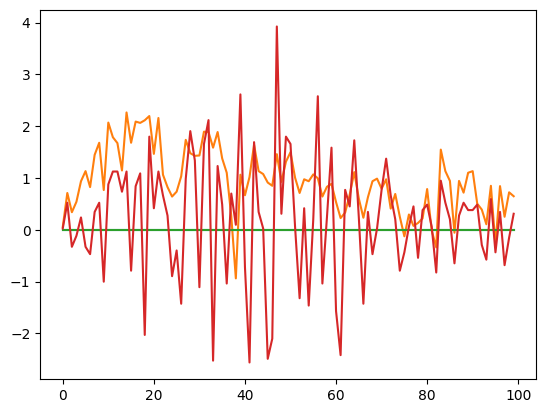

In [181]:
plot_predictions2(model5, X3_test, y3_test)